In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from pathlib import Path

from eee.solar.model import Location

## read data

In [5]:
ticket_path = Path.home()/"OneDrive-3E/Research/Solar/tickets/2024/IN3043_accuracy_factors_analysis/IN3136_EURAC_shared_folder/data_sites"
output_dir = Path.home()/"OneDrive-3E/Research/Solar/tickets/2024/IN3043_accuracy_factors_analysis/IN3275_use_solar_resource_api/clearsky"

In [4]:
sites_metadata = pd.read_csv(os.path.join(ticket_path, "sites_metadata.csv"), index_col=0)
sites_metadata

,country,latitude,longitude,altitude,provider
station_name,,,,,
camborne,United Kingdom,50.22,-5.32,88.0,bsrn
carpentras,France,44.08,5.06,100.0,bsrn
budapest_lorinc,Hungary,47.43,19.18,139.0,bsrn
magurele_mars,Romania,44.34,26.01,110.0,bsrn
cabauw,Netherlands,51.97,4.93,0.0,bsrn
...,...,...,...,...,...
dublin_arpt,Ireland,53.43,-6.23,82.0,wrdc
grossenzersdorf,Austria,48.20,16.57,157.0,wrdc
gonzaga,Italy,44.96,10.77,16.0,lombardy


In [15]:
times = pd.date_range(start="2022-01-01", end="2024-01-01", freq="H")


In [18]:
for index, metadata in sites_metadata.iterrows():
    location = Location(latitude=metadata["latitude"], longitude=metadata["longitude"], altitude=metadata["altitude"])
    clearsky = location.get_irre_clearsky(times=times)
    ghi = clearsky["ghi"].rename('global_horizontal')
    
    file_name = f"{index}.csv"  
    ghi.to_csv(os.path.join(output_dir, file_name))
    print(f"Data saved to {file_name}")
    

Data saved to camborne.csv
Data saved to carpentras.csv
Data saved to budapest_lorinc.csv
Data saved to magurele_mars.csv
Data saved to cabauw.csv
Data saved to cener.csv
Data saved to payerne.csv
Data saved to heino.csv
Data saved to lauwersoog.csv
Data saved to lelystad_locatie_23t.csv
Data saved to stavoren.csv
Data saved to herwijnen.csv
Data saved to hohenpeißenberg.csv
Data saved to mannheim.csv
Data saved to schleswig.csv
Data saved to görlitz.csv
Data saved to hamburg_fuhlsbüttel.csv
Data saved to seehausen.csv
Data saved to rostock_warnemünde.csv
Data saved to dresden_klotzsche.csv
Data saved to lautertal_oberlauter.csv
Data saved to leinefelde.csv
Data saved to bremen.csv
Data saved to stuttgart_schnarrenberg.csv
Data saved to nürnberg.csv
Data saved to weihenstephan_dürnast.csv
Data saved to saarbrücken_ensheim.csv
Data saved to aberporth.csv
Data saved to dunstaffnage.csv
Data saved to belfast_aldergrove_arpt.csv
Data saved to edinburgh.csv
Data saved to wattisham.csv
Data 

In [7]:
input_metadata_file = Path.home()/"OneDrive-3E/Research/Solar/tickets/2023/IN2833_centralize_measurement_data_collection/IN2835_BSRN/intermediate_data/bsrn_stations_metadata.csv"

In [8]:
input_ts_file = Path.home()/"OneDrive-3E/Research/Solar/tickets/2023/IN2833_centralize_measurement_data_collection/IN2835_BSRN/intermediate_data/alice_springs/alice_springs_17.csv"

### read station metadata

In [9]:
metadata = pd.read_csv(
    input_metadata_file,
    index_col=0,
)
metadata = metadata.drop(columns=["time_zone"])
station = "alice_springs"
metadata = metadata.loc[station]
metadata

code                                                             ASP
location            Macdonnell Ranges, Northern Territory, Australia
latitude                                                     -23.798
longitude                                                    133.888
altitude                                                       547.0
station_ori_name                                       Alice Springs
start_year                                                    2004.0
end_year                                                      2020.0
Name: alice_springs, dtype: object

### read measurement data

In [10]:
data = pd.read_csv(
    input_ts_file,
    index_col=0
)
data.index = pd.DatetimeIndex(data.index)
data

FileNotFoundError: [Errno 2] No such file or directory: '/home/lhn3e/OneDrive-3E/Research/Solar/tickets/2023/IN2833_centralize_measurement_data_collection/IN2835_BSRN/intermediate_data/alice_springs/alice_springs_17.csv'

### get clearsky data

In [ ]:
for index, metadata in sites_metadata.iterrows():
    location = Location(latitude=metadata["latitude"], longitude=metadata["longitude"], altitude=metadata["altitude"])
    clearsky = location.get_clearsky(times=data.index)
    
    # Assuming you want to save the "ghi" column to a CSV file
    filename = f"{index}_clearsky.csv"  # Using station name as filename
    clearsky.to_csv(filename)

In [11]:
location = Location(
    latitude=metadata["latitude"],
    longitude=metadata["longitude"],
    altitude=metadata["altitude"],
)

In [13]:
clearsky = location.get_irre_clearsky(
    times=metadata.index,
)
clearsky

ParserError: Unknown string format: code

### plot

In [8]:
plot_start = "2017-05-03T00:00:00+00:00" 
plot_end = "2017-05-07T00:00:00+00:00"

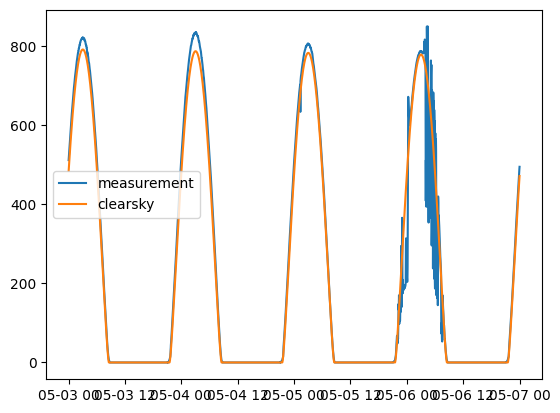

In [9]:
plt.clf()
plt.plot(data["global"].loc[plot_start:plot_end], label="measurement")
plt.plot(clearsky["ghi"].loc[plot_start:plot_end], label="clearsky")
plt.legend()
plt.show()